## CS6650 Homework 1 (Holi 2023 Semester)
#### Smartphone based Photoplethysmography (PPG)
The task is to develop a PPG system using a smartphone device to capture blood flow related imagery data and post-process such data to estimate the pulse or heart beat rate of the subject. You need to implement various features pertaining to the above task in this notebook. Create a directory, <b><your_roll>_CS6650H23</b>. Place this notebook in that directory.

#### A. Warmup - Data Collection [10 points]
Use your smartphone’s camera to capture the blood-flow video. Turn on the flash while recording and turn it off once done. Capture the video using the maximum frame rate that is available in your phone (e.g.60 fps or 30 fps). The same holds for image resolution. The captured videos are saved on the device’s SD card. Collect 3 such videos (each exactly 10 seconds long, if longer just limit to N frames while processing, where N = 10*frames_per_second) under the following conditions. Make sure that all video capture configurations are kept the same across the cases (resolution, fps).
* resting on bed (1.mp4)
* after a moderate walk (2.mp4), and
* after a vigorous exercise (3.mp4).

Copy these videos locally to your project folder in a subdirectory "ppgvideos" - name them (1/2/3).mp4. Don’t move your finger/hand randomly or press too hard against the camera or flash while recording, little randomness is okay. Write a script to read the three videos and store the frames (2D vector of (R G B) values).

In [2]:
## your snippet to read the three videos, display the number of frames and resolution in each video
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

videoPaths = ["ppgvideos1.mp4", "ppgvideos2.mp4", "ppgvideos3.mp4"]
# This is a map from the video ID to its list of frames.
videoFrames = {"1":[], "2":[], "3":[]}

for index, videoPath in enumerate(videoPaths):
    cap = cv2.VideoCapture(videoPath)

    #some sample constants in openCV, check out for more
    fps = cap.get(cv2.CAP_PROP_FPS)
    cnt = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    f_w = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    f_h = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

    while cap.isOpened():
        ret, frame = cap.read()
        if ret:
            videoFrames[str(index+1)].append(frame)
        else:
            break
    cap.release()
    cv2.destroyAllWindows()

    print(videoPath+", Frame Count: "+str(cnt)+", FPS: "+str(fps))
    

ppgvideos1.mp4, Frame Count: 326.0, FPS: 30.0
ppgvideos2.mp4, Frame Count: 305.0, FPS: 30.0
ppgvideos3.mp4, Frame Count: 313.0, FPS: 30.0


#### B. Sensing Metric [5 points]
Design your sensing metric. Note that each frame is a 2D vector of size [AxB], containing A.B pixels, where a pixel at location [i,j] is denoted by the 3-tuple [B, G, R] where B, G, and R are bytes (8 bits, range 0 - 255) representing intensity of each color - Blue, Green and Red. The frame intensity metric is an aggregate statistical measure on the pixel values. (you can even consider R, G and B streams separately or consider greyscale frames). Best to have a normalized value between zero and one. [5 points]

In [48]:
## put your snippet here with complete explanation in comments
## Marks will be provided based on code readability (not yourself, but others) and detailed comments

frameIntensities = {"1":[], "2":[], "3":[]}

## The sensing metric is the average of b,g,r intensities normalized to range of 0-100
for key in videoFrames:
    for frame in videoFrames[key]:
        frameIntensities[key].append((np.mean(frame))*(100/256))

    

#### C. Temporal Variation of Intensity Value [10 points]
Plot your frame intensity metric vs. time for a random 5-second chunk of the three videos. The X-axis should be common for all three subplots (stacked vertically) with separate Y-axes based on your intensity metric. Appreciate the fact that vigorous exercise leads to rapid intensity variations compared to while resting. What is the BPM value for the three cases (manually counting is okay)?

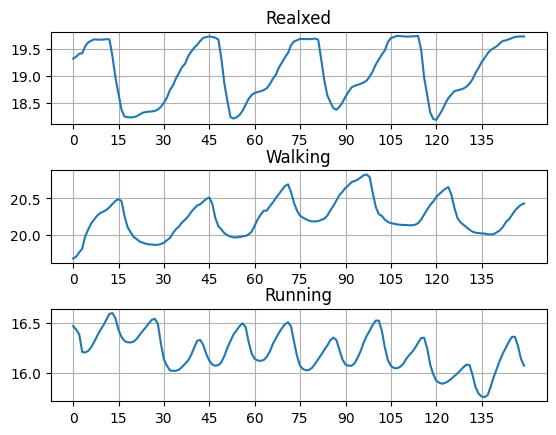

In [62]:
## put your snippet here with complete explanation in comments
## Marks will be provided based on code readability (not yourself, but others) and detailed comments

## Common x axis and 3 different y axis representing each dataset (relaxed, walking and running)
x = np.arange(0,150)
y1 = frameIntensities["1"][0:150]
y2 = frameIntensities["2"][0:150]
y3 = frameIntensities["3"][0:150]

fig, (ax1, ax2, ax3) = plt.subplots(3)
plt.setp((ax1, ax2, ax3), xticks=np.arange(0, 150, 15))
plt.subplots_adjust(hspace=0.5)

## Plot for All 3 datasets
ax1.plot(x, y1)
ax1.set_title("Realxed")
ax1.grid()

ax2.plot(x, y2)
ax2.set_title("Walking")
ax2.grid()

ax3.plot(x, y3)
ax3.set_title("Running")
ax3.grid()


#### D. Likelihood Distributions [20 marks]
In the 5-second chunks taken above, choose 20 frames where your sensing metric is close to the local maximum (Case1), and 20 frames where it is close to the local minimum (Case2). Plot the histograms on "R", "G" and "B" values for each pixel in the 20 frames for the two cases 1 and 2. For each video there will be 3 figures, each for "R", "G" and "B". Which one produces the most separable distributions?

<BarContainer object of 256 artists>

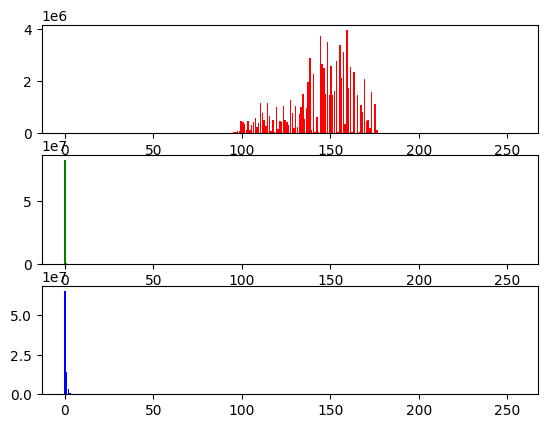

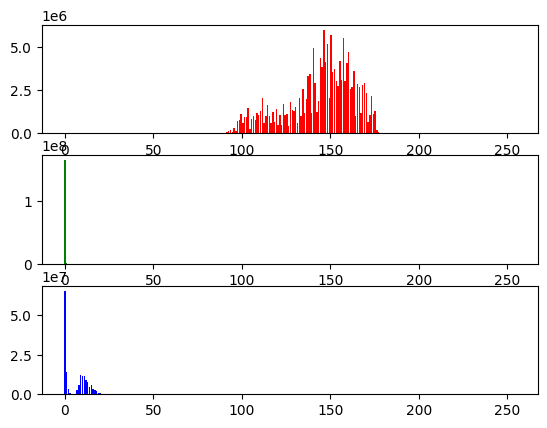

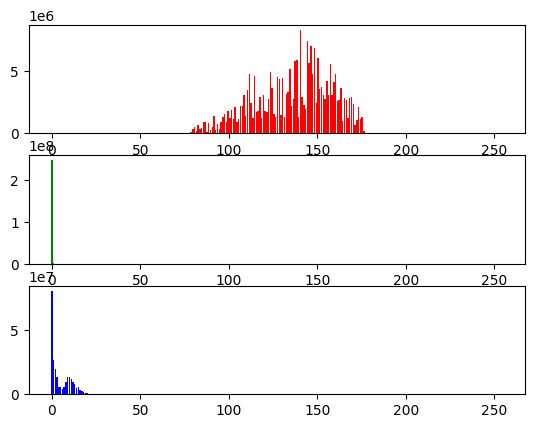

In [63]:
## put your snippet here with complete explanation in comments
## Marks will be provided based on code readability (not yourself, but others) and detailed comments

## Frames chosen for each video: (first 20 are max intensity frame, next 20 is minimum)
vid1 = [8,9,10,11,44,45,46,47,74,75,76,77,78,79,80,107,109,110,111,149,17,18,19,20,21,22,23,24,52,53,54,55,85,86,87,88,118,119,120,121]
vid2 = [13,14,15,16,42,43,44,45,46,69,70,71,95,96,97,98,122,123,124,125,0,1,26,27,28,52,53,54,78,79,80,81,108,109,110,111,136,137,138,139]
vid3 = [12,13,26,27,41,42,56,57,70,71,86,87,99,100,115,116,130,131,144,145,3,4,19,20,32,33,46,47,61,62,76,77,91,92,105,106,121,122,135,136]

## count_. is an array of length 256 used to sum the frequencies of each intensities across all frames, to be put in one histogram
nb_bins = 256
count_r = np.zeros(nb_bins)
count_g = np.zeros(nb_bins)
count_b = np.zeros(nb_bins)

## For each video the Max/Min frames and taken and their histo data is extracted which is then added to count_.
for i in vid1:                                                                  ## For Dataset 1
    img = videoFrames["1"][i]
    hist_b = np.histogram(img[:,:,0], bins=nb_bins, range=[0, 255])
    hist_g = np.histogram(img[:,:,1], bins=nb_bins, range=[0, 255])
    hist_r = np.histogram(img[:,:,2], bins=nb_bins, range=[0, 255])
    count_r += hist_r[0]
    count_g += hist_g[0]
    count_b += hist_b[0]

bins = hist_r[1]
fig, (ax1, ax2, ax3) = plt.subplots(3)                                          ## Plotting frequencies of each
ax1.bar(bins[:-1], count_r, color='r')                                          ## intensity for b,g,r
ax2.bar(bins[:-1], count_g, color='g')                                          
ax3.bar(bins[:-1], count_b, color='b')

for i in vid2:                                                                  ## For Dataset 2
    img = videoFrames["2"][i]
    hist_b = np.histogram(img[:,:,0], bins=nb_bins, range=[0, 255])
    hist_g = np.histogram(img[:,:,1], bins=nb_bins, range=[0, 255])
    hist_r = np.histogram(img[:,:,2], bins=nb_bins, range=[0, 255])
    count_r += hist_r[0]
    count_g += hist_g[0]
    count_b += hist_b[0]

bins = hist_r[1]
fig, (ax1, ax2, ax3) = plt.subplots(3)                                          ## Plotting frequencies of each
ax1.bar(bins[:-1], count_r, color='r')                                          ## intensity for b,g,r
ax2.bar(bins[:-1], count_g, color='g')
ax3.bar(bins[:-1], count_b, color='b')

for i in vid3:                                                                  ## For Dataset 3
    img = videoFrames["3"][i]
    hist_b = np.histogram(img[:,:,0], bins=nb_bins, range=[0, 255])
    hist_g = np.histogram(img[:,:,1], bins=nb_bins, range=[0, 255])
    hist_r = np.histogram(img[:,:,2], bins=nb_bins, range=[0, 255])
    count_r += hist_r[0]
    count_g += hist_g[0]
    count_b += hist_b[0]

bins = hist_r[1]
fig, (ax1, ax2, ax3) = plt.subplots(3)                                          ## Plotting frequencies of each
ax1.bar(bins[:-1], count_r, color='r')                                          ## intensity for b,g,r
ax2.bar(bins[:-1], count_g, color='g')
ax3.bar(bins[:-1], count_b, color='b')

#### E. Threshold Based Detection and ROC curve [25 marks]
Only consider the "R" channel for analysis. Suppose, we just use a single pixel (uniformly randomly chosen in the frame) to detect whether the frame belongs to case 1 or case 2. You can denote the "Case 1" to be the POSITIVE event/hypothesis and "Case 2" to be the NEGATIVE event/null hypothesis. For every threshold value, for every frame, choose 500 random pixels. Compute the "Probability of Detection" ($P_D$) and "Probability of False Alarm" ($P_{FA}$). Note that you have (20 + 20) = 40 frames, and 500 detections per frame, i.e., 20000 total detections. Plot the $ROC$ curve. Which one has the best ROC curve (Dataset 1, 2 or 3)?

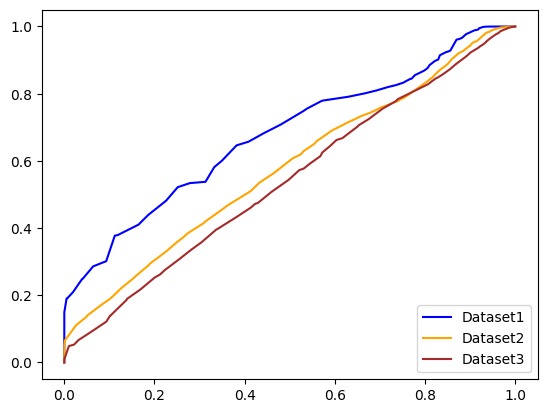

In [51]:
## put your snippet here with complete explanation in comments
## Marks will be provided based on code readability (not yourself, but others) and detailed comments

## Resolution of the video
width = 1920
height = 1080

detectionsMax1, detectionsMax2, detectionsMax3 = [],[],[]   ## each set will contain R_intensity of 10k Max intensity frames
detectionsMin1, detectionsMin2, detectionsMin3 = [],[],[]   ## each set will contain R_intensity of 10k Min intensity frames
for j in range(0,20) :

    x = np.random.randint(0,height, 500)                    ## generating 500 random x,y values and 
    y = np.random.randint(0,width, 500)                     ## using them to choose random pixels

    frameMax1 = videoFrames["1"][vid1[j]]                   ## max frame from vid1
    frameMin1 = videoFrames["1"][vid1[j+20]]                ## min frame from vid1
    frameMax2 = videoFrames["2"][vid2[j]]
    frameMin2 = videoFrames["2"][vid2[j+20]]
    frameMax3 = videoFrames["3"][vid3[j]]
    frameMin3 = videoFrames["3"][vid3[j+20]]

    for i in range(0,500):                                  ## getting r intensities from the selected frames and appending it 
        detectionsMax1.append(frameMax1[y[i]][x[i]][2])
        detectionsMin1.append(frameMin1[y[i]][x[i]][2])
        detectionsMax2.append(frameMax2[y[i]][x[i]][2])
        detectionsMin2.append(frameMin2[y[i]][x[i]][2])
        detectionsMax3.append(frameMax3[y[i]][x[i]][2])
        detectionsMin3.append(frameMin3[y[i]][x[i]][2])


P_dArr1, P_dArr2, P_dArr3 = [],[],[]                        ## array to hold P_d of all threshold
P_faArr1, P_faArr2, P_faArr3 = [],[],[]                     ## aray to hold P_fa of all threshold

for threshold in range(0,256):
    detect_param1, detect_param2, detect_param3 = 0,0,0                 ## variable to count correct detections
    falseAlarm_param1, falseAlarm_param2, falseAlarm_param3 = 0,0,0     ## variable to count false alarm
    for i in range(0, len(detectionsMax1)) :                        
        if(detectionsMax1[i]>=threshold): detect_param1+=1              ## no. of CDs and FAs are counted
        if(detectionsMin1[i]>=threshold): falseAlarm_param1+=1
        if(detectionsMax2[i]>=threshold): detect_param2+=1
        if(detectionsMin2[i]>=threshold): falseAlarm_param2+=1
        if(detectionsMax3[i]>=threshold): detect_param3+=1
        if(detectionsMin3[i]>=threshold): falseAlarm_param3+=1
    P_d1 = detect_param1/10000                                          ## calculating Pd and Pfa for each threshold
    P_fa1 = falseAlarm_param1/10000
    P_dArr1.append(P_d1)
    P_faArr1.append(P_fa1)
    P_d2 = detect_param2/10000
    P_fa2 = falseAlarm_param2/10000
    P_dArr2.append(P_d2)
    P_faArr2.append(P_fa2)
    P_d3 = detect_param3/10000
    P_fa3 = falseAlarm_param3/10000
    P_dArr3.append(P_d3)
    P_faArr3.append(P_fa3)

## Plotting ROC curve for all 3 datsets in same plot
plt.plot(P_faArr1,P_dArr1, color="blue")
plt.plot(P_faArr2,P_dArr2, color="orange")
plt.plot(P_faArr3,P_dArr3, color="brown")
plt.legend(["Dataset1", "Dataset2", "Dataset3"], loc= "lower right")

#### F. Are "good" samples spatially correlated? [20 marks]
First, choose an optimal threshold, $T_{OPT}$, that best suits your data (maximize $P_D$ while minimizing $P_{FA}$, you may look into maximizing the $\frac{P_D}{P_{FA}}$ ratio). Out of the 20000 total detections above for $T_{OPT}$, can it be hypothesised that the "good" samples (true positives and true negatives) are spatially clustered in certain areas of the frame, compared to the "bad" samples (false positives and false negatives)?

T_opt for first dataset is:  170
T_opt for second dataset is:  174
T_opt for third dataset is:  151


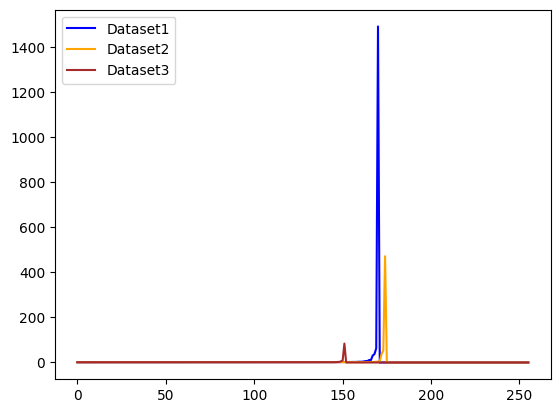

In [52]:
## put your snippet here with complete explanation in comments
## Marks will be provided based on code readability (not yourself, but others) and detailed comments

gamma1Arr, gamma2Arr, gamma3Arr = [],[],[]                              ## calculating Pd/Pfa for each threshold for 3 datasets
for i in range(0,256):
    if(P_faArr1[i]!=0): gamma1Arr.append(P_dArr1[i]/P_faArr1[i])
    else : gamma1Arr.append(0)
    if(P_faArr2[i]!=0): gamma2Arr.append(P_dArr2[i]/P_faArr2[i])
    else : gamma2Arr.append(0)
    if(P_faArr3[i]!=0): gamma3Arr.append(P_dArr3[i]/P_faArr3[i])
    else : gamma3Arr.append(0)

plt.plot(range(0,256),gamma1Arr, color="blue")                          ## plotting gamma for different sets in same plot       
plt.plot(range(0,256),gamma2Arr, color="orange")
plt.plot(range(0,256),gamma3Arr, color="brown")
plt.legend(["Dataset1", "Dataset2", "Dataset3"], loc= "upper left")

T_opt1 = gamma1Arr.index(max(gamma1Arr))                                ## calculating Topt based on gamma
T_opt2 = gamma2Arr.index(max(gamma2Arr))
T_opt3 = gamma3Arr.index(max(gamma3Arr))

print("T_opt for first dataset is: ", T_opt1)
print("T_opt for second dataset is: ", T_opt2)
print("T_opt for third dataset is: ", T_opt3)

#### Submission (report document: 10 marks)
##### Deadline: $4^{th}$, March, 2023
* Compress the top level directory (ZIP format) containing this notebook with filled-in code along with the ppgvideos folder.
* Include a PDF file (10 marks) within the directory, name it "report.pdf". Mention your name and roll number.
* The report should contain explanations related to the above assignments (A through F), assumptions if any, specific code explanations, algorithms used and inferences made from the plots. Also include references if any.
* <b>You MUST not consult your homework code with others</b>. Any plagiarism found in your code (or somebody who is referring to your code) will result in zero credits in this assignment.
* Submissions after the deadline will not be entertained.